# Python script to make Julia sets using Pytorch
## Code can use CPU or GPU
#### Copyright: Dane Taylor, November 11, 2019




In [0]:
import sys
import os
import torch
import matplotlib.pyplot as plt 
import numpy as np

The next two code cells are intended for users of Google Colab, which provides free access to an entry-level GPU.
* Save the Jupyter notebook '.ipynb' file into your Google Drive.
* Locate file in Drive, rightclick and select 'Open in Colab'.
* Execute the first cell and follow instructions to mount your Google Drive.
* Go to the tab 'Runtime', select 'Choose Runtime Time', and select GPU.

(Comment out the following two cells if you don't use Colab)


In [28]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
BASE_FOLDER = '/content/drive/My Drive/Colab Notebooks'
sys.path.append(BASE_FOLDER)
#print(sys.path)

#### Change this to GPU to get 15x speedup of code (1.6 sec vs 24 sec). You must have access to a GPU.

In [0]:
dev = 'gpu'
#dev = 'cpu'

# Define a function that computes Julia sets

In [0]:
def get_Julia_set(device='cpu', #default device is cpu
                  c=complex(-.1,.65), #default constant c
                  thresh=4, 
                  xrange=[-1.5,1.5], 
                  yrange=[-1.5,1.5], 
                  w = 2000, 
                  h = 1000, 
                  maxiter = 1000):
    
    if device=='gpu':
        x = torch.linspace(xrange[0], xrange[1], w, dtype=torch.float).cuda().type(torch.half) 
        y = torch.linspace(yrange[0], yrange[1], h, dtype=torch.float).cuda().type(torch.half) 
        julia_set = torch.zeros(w*h, dtype=torch.int64).reshape(w,h).cuda()
    
    if device=='cpu':
        x = torch.linspace(xrange[0], xrange[1], w, dtype=torch.float)
        y = torch.linspace(yrange[0], yrange[1], h, dtype=torch.float)
        julia_set = torch.zeros(w*h, dtype=torch.int64).reshape(w,h)
    
    x, y = torch.meshgrid([x,y])
        
    for i in range(maxiter):
        x2 = x**2
        y2 = y**2     
        ids = (x2+y2) > thresh
        julia_set[ids] = i #iteration where cross threshold

        #z**2 + c = (zx+zyi)**2 + (cx+cyi) = (zx**2-zy**2 + cx) + (2*zx*zy + cy)i
        x_new = x2 - y2 + np.real(c) 
        y_new = 2*x*y + np.imag(c)
        x = x_new
        y = y_new

            
    return julia_set.t()

Code to plot the Julia set

In [0]:
def plot_Julia_set(M):

  DPI = 1000

  fig = plt.figure(figsize=(3.200, 2.400), dpi=DPI)
  img = plt.imshow(M.cpu().numpy(),interpolation='nearest')
  img.set_cmap('copper')
  #img.set_cmap('cubehelix')
  plt.axis('off')
  plt.savefig(BASE_FOLDER+'/julia_set1.png', dpi=DPI, bbox_inches='tight', pad_inches = 0)
  return 

In [56]:
%time M = get_Julia_set(device=dev,c=complex(-.1,.65),thresh=997, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 4000, h = 2000, maxiter = 10**4)

CPU times: user 11 s, sys: 5.67 s, total: 16.7 s
Wall time: 16.7 s


CPU times: user 1.27 s, sys: 25.2 ms, total: 1.29 s
Wall time: 1.31 s


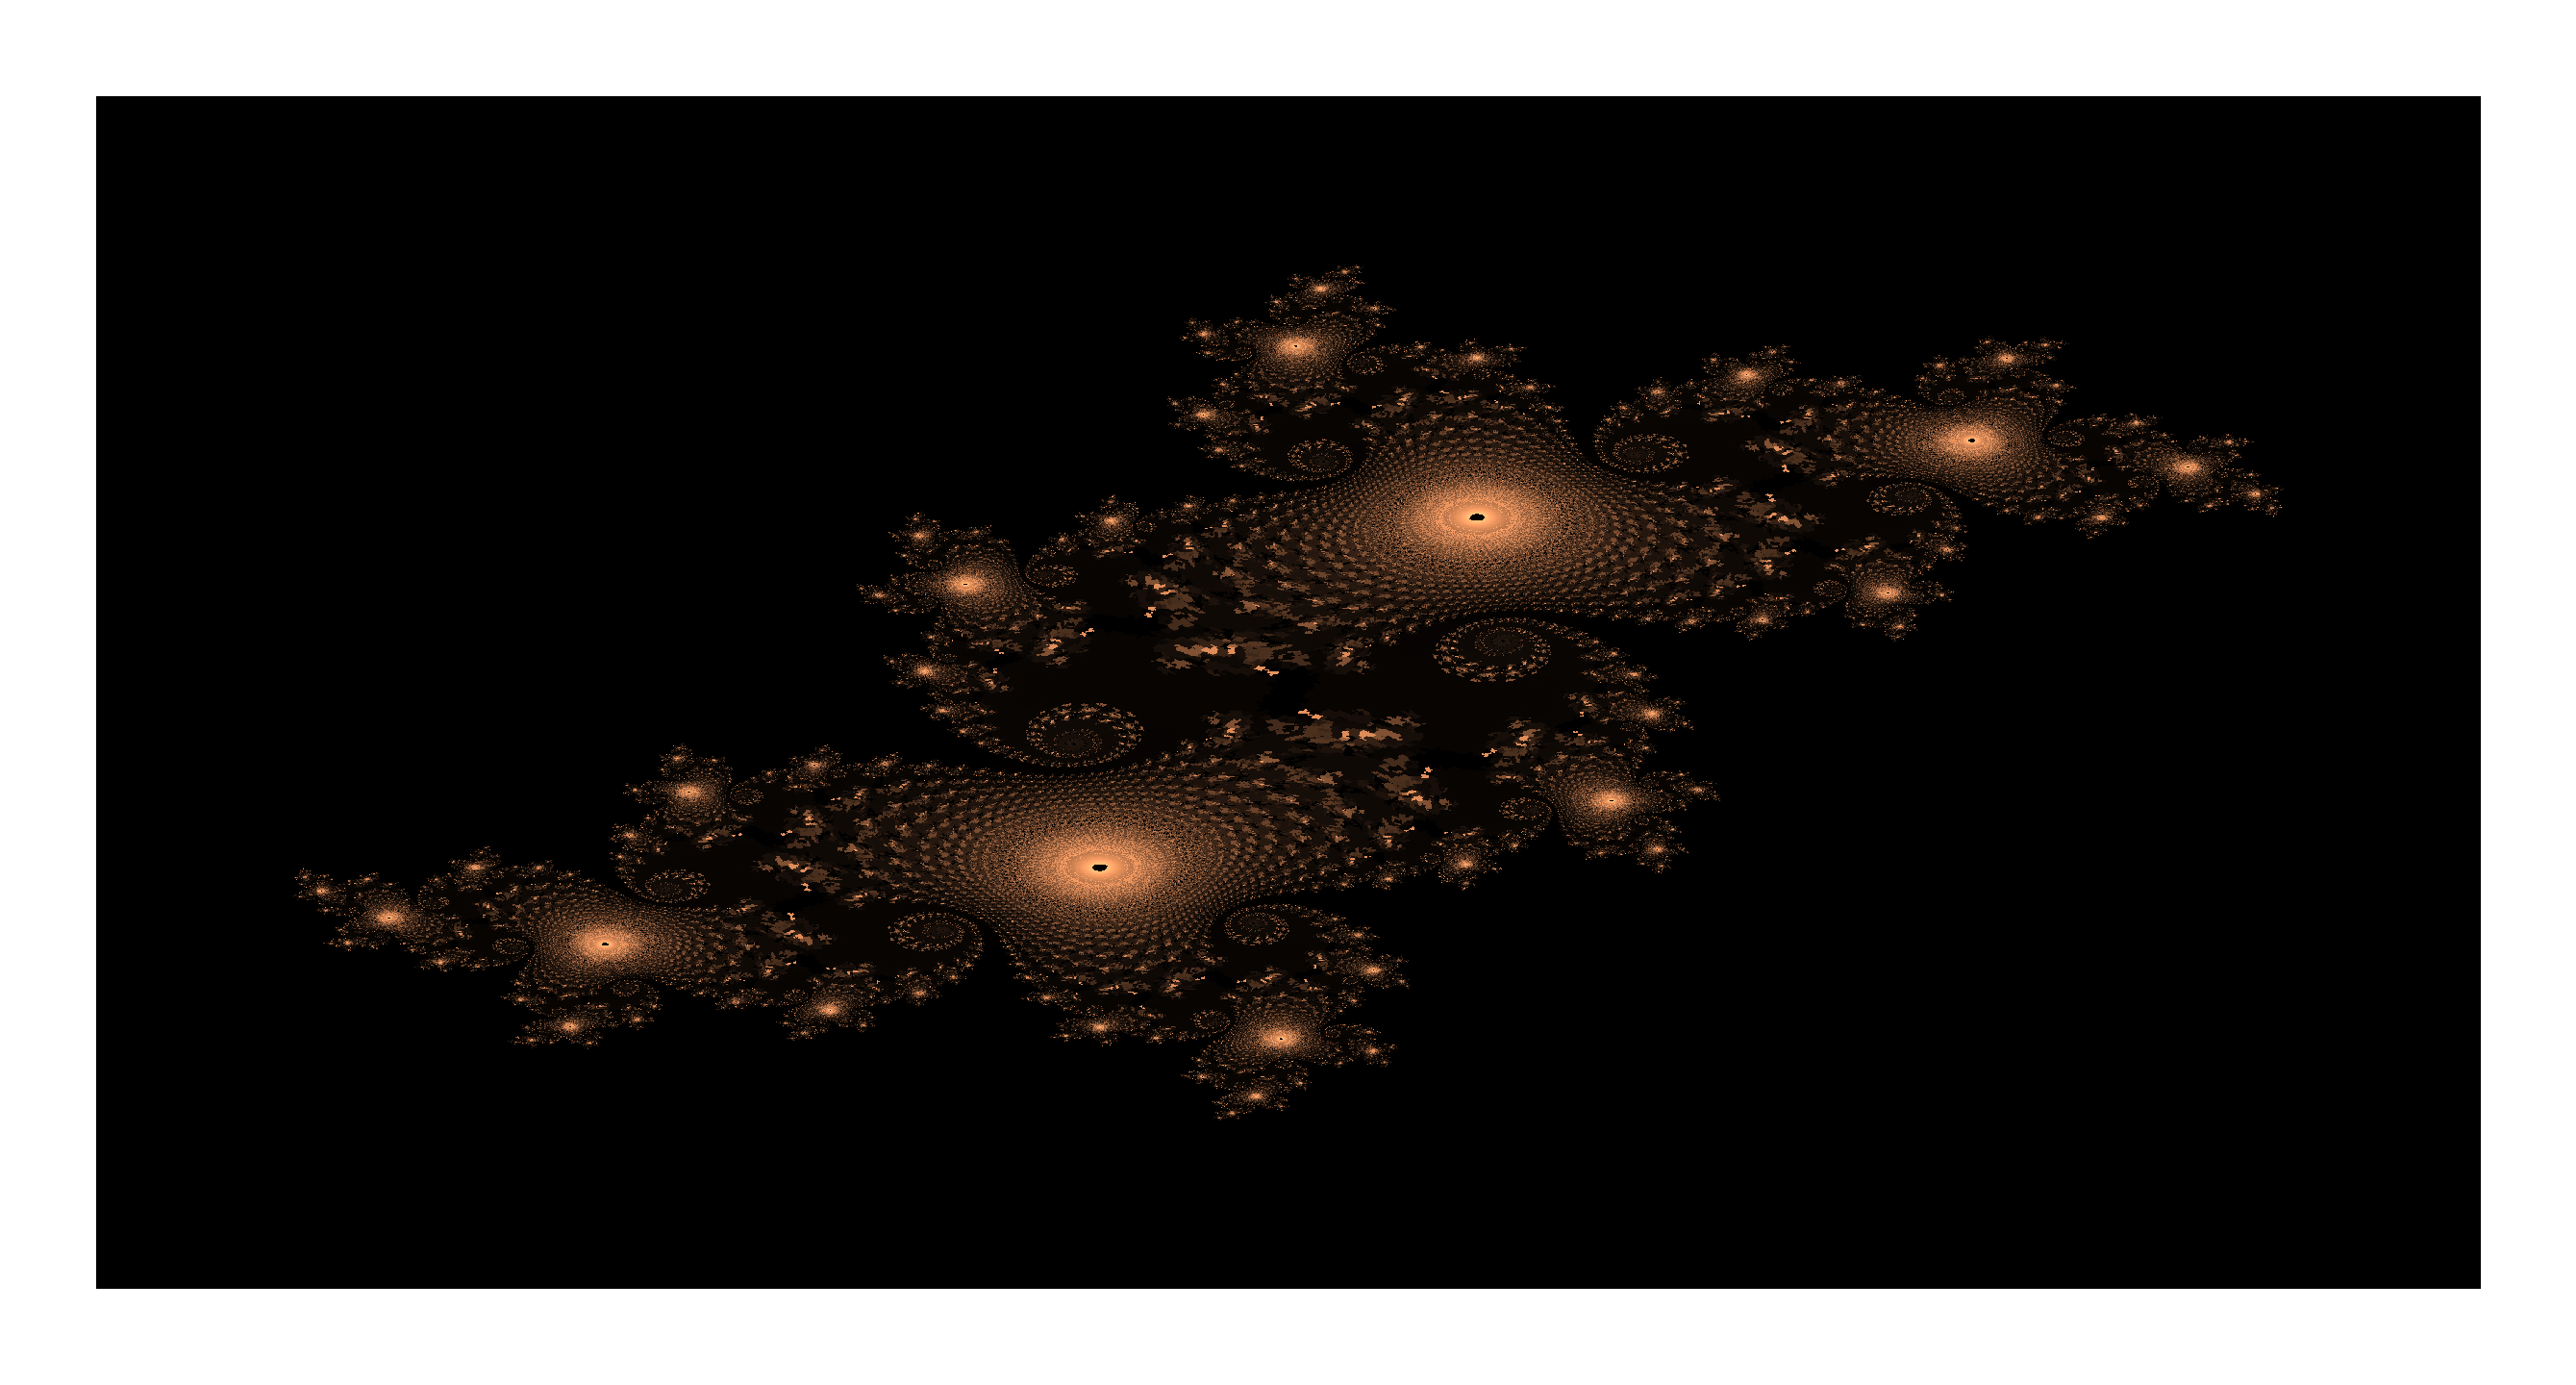

In [57]:
%time plot_Julia_set(M)

Try a different choice for the constant c

In [35]:
%time M = get_Julia_set(device=dev,c=complex(-0.8,0.156),thresh=241, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 4000, h = 2000, maxiter = 10**4)

CPU times: user 9.53 s, sys: 4.5 s, total: 14 s
Wall time: 14.2 s


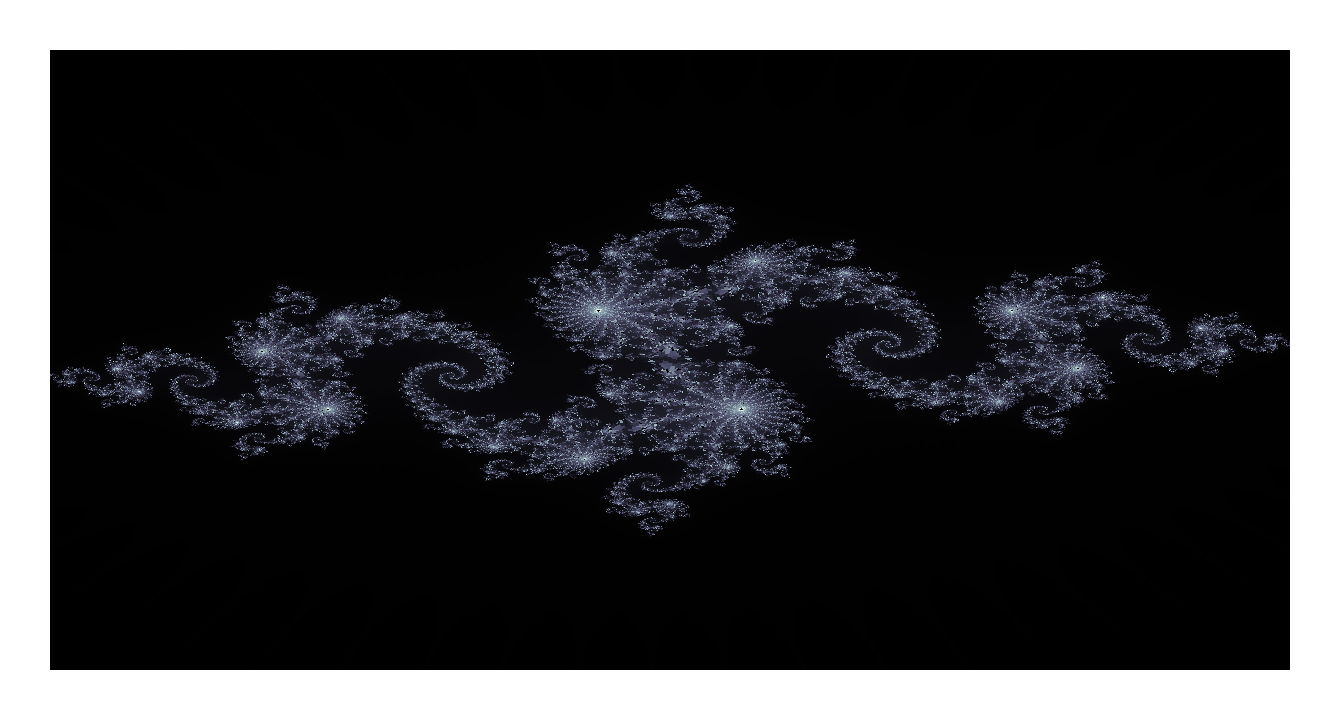

In [36]:
plt.figure(figsize=(3.200, 2.400), dpi=500)
img = plt.imshow(M.cpu().numpy(),interpolation='nearest')
img.set_cmap('bone')
plt.axis('off')
plt.savefig(BASE_FOLDER+'/julia_set2.png', dpi=500,bbox_inches='tight',pad_inches = 0)

Try another different choice for the constant c. This one is set to GPU so it may no run for you :-)

In [53]:
%time M = get_Julia_set(device='gpu',c=complex(-0.75,0.11),thresh=10, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 2000, h = 1000, maxiter = 10**3)

CPU times: user 542 ms, sys: 104 ms, total: 646 ms
Wall time: 652 ms


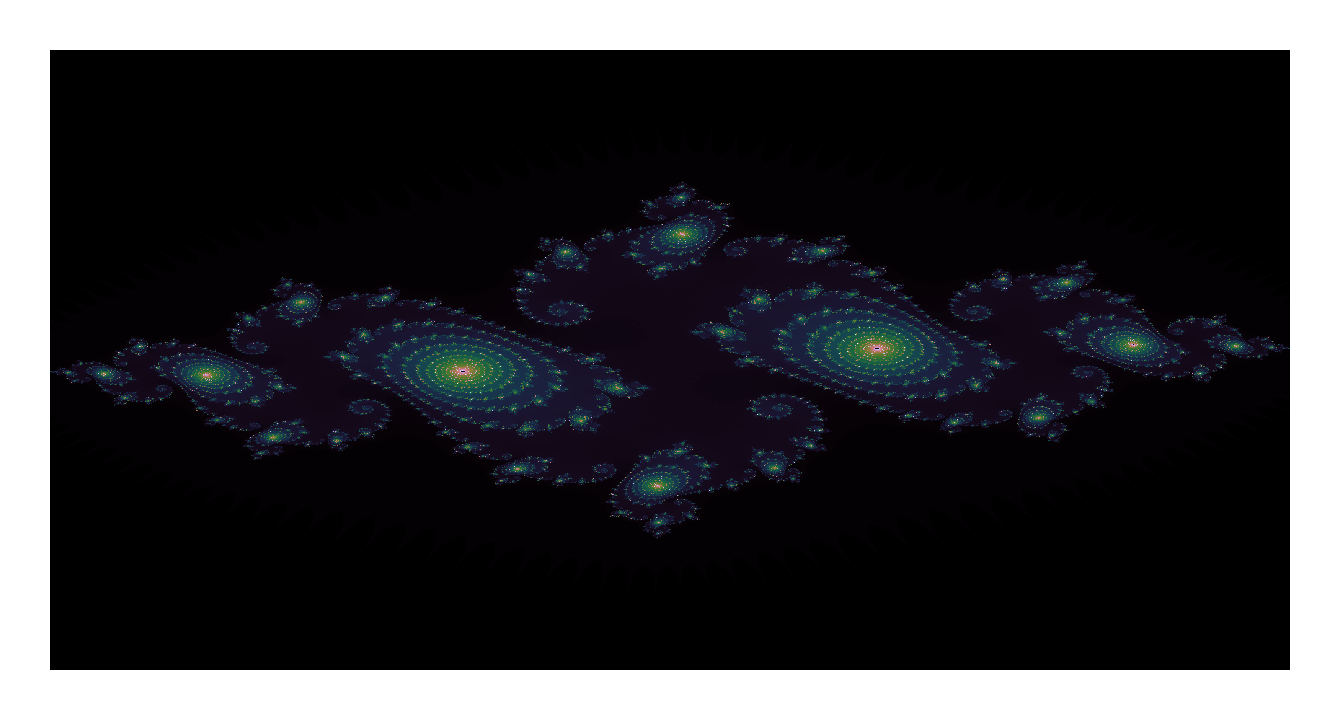

In [54]:
plt.figure(figsize=(3.200, 2.400), dpi=500)
img = plt.imshow(M.cpu().numpy(),interpolation='nearest')
img.set_cmap('cubehelix')
plt.axis('off')
plt.savefig(BASE_FOLDER+'/julia_set3.png', dpi=1000,bbox_inches='tight',pad_inches = 0)

In [0]:
import numpy as np

In [40]:
x = np.linspace(0,1,10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [41]:
x = torch.linspace(0,1,10).cuda()
x = torch.linspace(0,1,10).cuda()
x


tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000], device='cuda:0')

In [42]:
%time np.random.rand(10**8)

CPU times: user 1.03 s, sys: 4.11 ms, total: 1.04 s
Wall time: 1.1 s


array([0.50322134, 0.00372308, 0.92023941, ..., 0.08196432, 0.80500672,
       0.97051585])

In [43]:
x = torch.rand(10**8).cuda()
y = torch.rand(10**8).cuda()
%time torch.dot(x,y)

CPU times: user 732 µs, sys: 904 µs, total: 1.64 ms
Wall time: 1.64 ms


tensor(25000916., device='cuda:0')

In [44]:
x = torch.rand(10**8)
y = torch.rand(10**8)
%time torch.dot(x,y)

CPU times: user 93 ms, sys: 0 ns, total: 93 ms
Wall time: 93.1 ms


tensor(25000396.)

In [45]:
x = np.random.rand(10**8)
y = np.random.rand(10**8)
%time np.dot(x,y)

CPU times: user 319 ms, sys: 2.88 ms, total: 321 ms
Wall time: 161 ms


25000001.502120364

In [46]:
torch.tensor(x)

tensor([0.2738, 0.8878, 0.5415,  ..., 0.1197, 0.3790, 0.2437],
       dtype=torch.float64)